In [1]:
from Curvas import import_Monaco_calculated_curves_from_database, CurveModel, print_number_of_curves_in_DB, print_curve_data, SuavizaYNormaliza, get_R50
import numpy as np
import matplotlib.pyplot as plt

monaco_database_file_path = 'sqlite:///Monaco_Reference_Data_Calculation.db'

curves = import_Monaco_calculated_curves_from_database()

# for curve in curves: print_curve_data(curve)
# print_number_of_curves_in_DB()

Equipo:      P, Fecha:       , Hora:        , Particula:   1, Energia:     6.0, DFS:         100.0, TC:          20.0, Coordenada:  Z, Profundidad: 0.0, Detector:    N/A
R50: 26.5
Equipo:      P, Fecha:       , Hora:        , Particula:   1, Energia:     9.0, DFS:         100.0, TC:          20.0, Coordenada:  Z, Profundidad: 0.0, Detector:    N/A
R50: 38.5
Equipo:      P, Fecha:       , Hora:        , Particula:   1, Energia:     12.0, DFS:         100.0, TC:          20.0, Coordenada:  Z, Profundidad: 0.0, Detector:    N/A
R50: 51.5
Equipo:      P, Fecha:       , Hora:        , Particula:   1, Energia:     15.0, DFS:         100.0, TC:          20.0, Coordenada:  Z, Profundidad: 0.0, Detector:    N/A
R50: 64.5
Equipo:      S, Fecha:       , Hora:        , Particula:   1, Energia:     6.0, DFS:         100.0, TC:          20.0, Coordenada:  Z, Profundidad: 0.0, Detector:    N/A
R50: 25.5
Equipo:      S, Fecha:       , Hora:        , Particula:   1, Energia:     9.0, DFS:         100.0

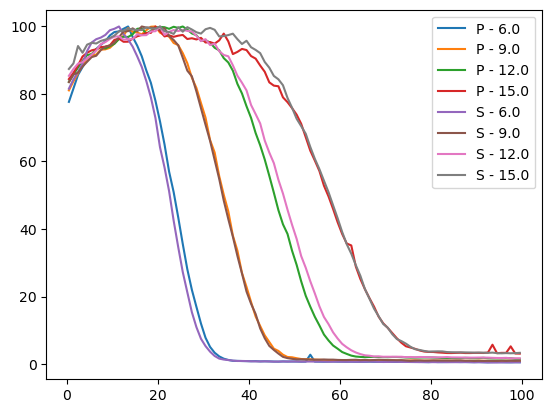

In [2]:
pdds_e = [curve for curve in curves if curve.particle==1 and curve.coordinate=='Z' and curve.field_size==20.0 and curve.machine == 'S']

plt.figure()
for pdd in pdds_e: 
    print_curve_data(pdd)
    SuavizaYNormaliza(pdd,sigma=0.00005, espaciamiento=0.5)
    print(f'R50: {get_R50(pdd)}')
    # pdd.relative_dose = pdd.relative_dose*100.0/pdd.relative_dose.max()
    plt.plot(pdd.axis[:100], pdd.relative_dose[:100], label=f'{pdd.machine} - {pdd.energy}')
plt.legend()
# plt.xlim(0,58)
# plt.ylim(80,105)
plt.show()
    



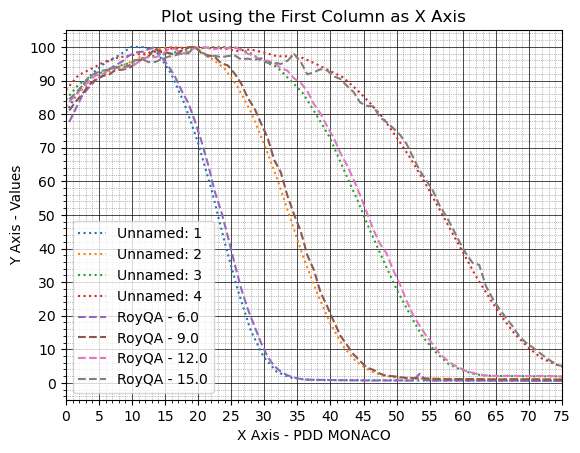

In [3]:
import pandas as pd
import matplotlib. pyplot as plt
import matplotlib.ticker as ticker

file_path = r'\\FS-201-Radioterapia.intecnus.org.ar\fisicos\9 - Dosimetría\3 - Controles Anuales\2020\2 - Platform Enero 2021\2 - Electrones - Ajuste energías INVAP - ajuste StarTrack\Comparacion linac vs MONACO - Perfiles y PDD 20x20.xlsx'

sheet_name = 'PDD'

# Lee las primeras 4 columnas de la hoja 'PDD'
df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=[0, 1, 2, 3, 4])

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Define the first column as the x-axis
x = df.iloc[:, 0]  # Use the first column for the x-axis

# Plot each of the remaining columns against the x-axis
for column in df.columns[1:]:
    plt.plot(x, df[column]/df[column].max()*100.0, label=column, linestyle=':')

for pdd in pdds_e:
    if pdd.field_size == 20.0 and pdd.machine == 'P':
        plt.plot(pdd.axis,pdd.relative_dose/pdd.relative_dose.max()*100.0, label=f'RoyQA - {pdd.energy}', linestyle='--')

# Add labels and title to the plot
plt.xlabel('X Axis - ' + df.columns[0])
plt.ylabel('Y Axis - Values')
plt.title('Plot using the First Column as X Axis')

# Add legend
plt.legend()
# plt.grid()
plt.xlim(0,75)
# plt.xlim(20,58)
# plt.ylim(40,60)

# Set major grid lines
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Set minor grid lines
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Modify grid spacing using ticker.MultipleLocator
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))  # Set major grid lines every 1 unit on x-axis
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # Set major grid lines every 0.5 unit on y-axis

# Optionally, set minor ticks and grids
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))  # Set minor grid lines every 0.2 units on x-axis
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(2))  # Set minor grid lines every 0.1 units on y-axis



# Display the plot
plt.show()